### 1. Importing necessary libraries
In this cell, libraries required for data analysis such as `pandas`, `numpy`, `scikit-learn`, `matplotlib`, and `seaborn` are imported.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


### 2. Loading and displaying data
In this section, the dataset is loaded and the first few rows are displayed for initial inspection.

In [2]:
# 1. Load the data
df = pd.read_csv(r'C:\Users\Core i7\Downloads\heart.csv')

# Display the first few rows of the data
print("Displaying the first few rows of the data:")
print(df.head())


Displaying the first few rows of the data:
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  target  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


### 3. Overview and descriptive statistics of the data
In this step, general information such as the number of rows, data types, and descriptive statistics are displayed.

In [3]:
# Check general information about the data
print("\nGeneral information about the data:")
print(df.info())

# Summary statistics of the data
print("\nSummary statistics of the data:")
print(df.describe())



General information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Summary statistics of the data:
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.0000

### 4. Data Preprocessing

In this section, the data is checked for missing values, and then the data is split into two parts: features (X) and labels (y)

In [4]:
# 2. Data Preprocessing
# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())

# Split the data into features and labels
X = df.drop('target', axis=1)
y = df['target']



Checking for missing values:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
target      0
dtype: int64


### 5. Splitting Data into Training and Testing Sets and Standardization

The data is split into training and testing sets, and then the values are normalized using standardization

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 6. Training the SVM Model with a Polynomial Kernel
The Support Vector Machine (SVM) model is trained using a polynomial kernel on the training data

In [6]:
# 3. Train the model
# Using the optimized parameters for the polynomial kernel
model = SVC(kernel='poly', random_state=42)
model.fit(X_train, y_train)


SVC(kernel='poly', random_state=42)

### 7. Evaluating the Model Using Test Data
In this section, the trained model is tested on the test data, and the confusion matrix, classification report, and model accuracy are calculated

In [7]:
# Predict on the test data
y_pred = model.predict(X_test)

# 4. Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nModel Accuracy:")
print(accuracy_score(y_test, y_pred))



Confusion Matrix:
[[26  3]
 [ 3 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


Model Accuracy:
0.9016393442622951


### 8. Displaying the Confusion Matrix as a Heatmap
The confusion matrix is displayed as a heatmap to easily visualize the classification results

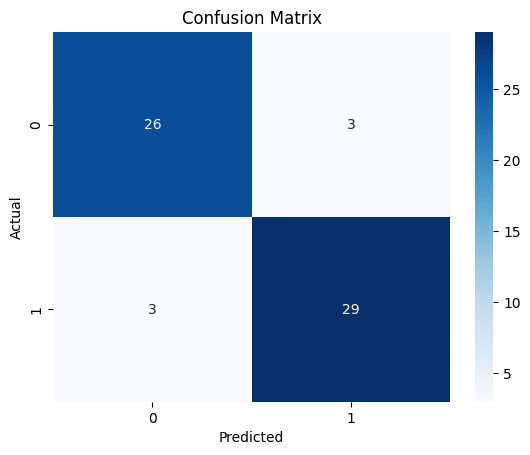

In [8]:
# 5. Visualize the results
# Display the confusion matrix as a heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### 9. Displaying the Correlation Matrix

In this section, the correlation matrix of the data features is calculated and displayed as a heatmap


Displaying the Correlation Matrix:


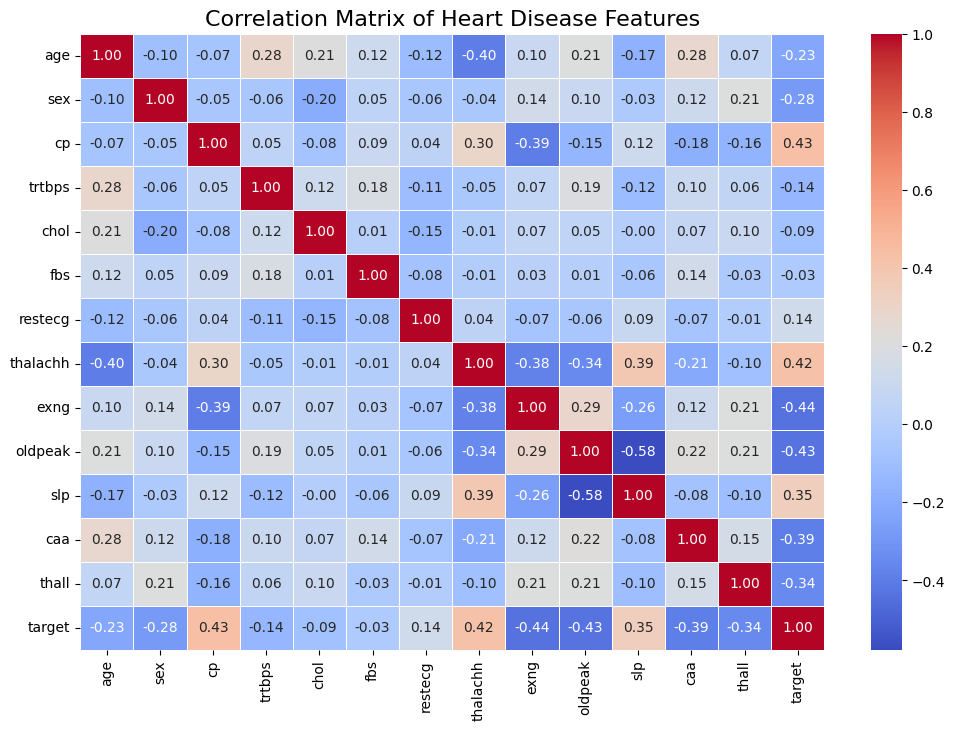

In [9]:
# 6. Correlation Matrix Visualization
print("\nDisplaying the Correlation Matrix:")

# Calculate and plot the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Set title and display the heatmap
plt.title('Correlation Matrix of Heart Disease Features', fontsize=16)
plt.show()


## Author

Mostafa Haji Shafiei